In [2]:
import pandas as pd
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import numpy as np

# Task 3: Load in the Dataset in your Jupyter Notebook

In the Jupyter notebook you created in the previous task, add a code cell, and copy the contents below to load the Boston housing dataset in the notebook:

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

[Text(0.5, 1.0, "MEDV - Median value of owner-occupied homes in $1000's")]

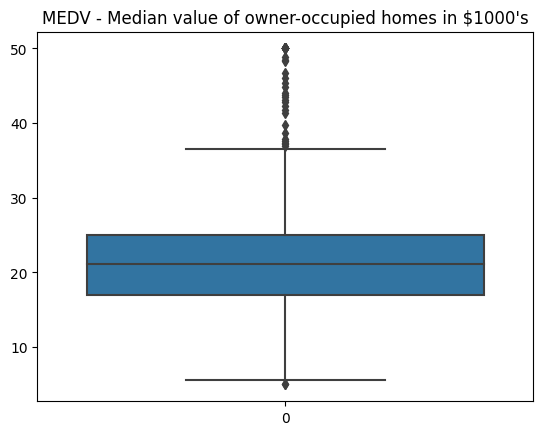

In [8]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(boston_df['MEDV']).set(title='MEDV - Median value of owner-occupied homes in $1000\'s')

[Text(0.5, 1.0, 'CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)')]

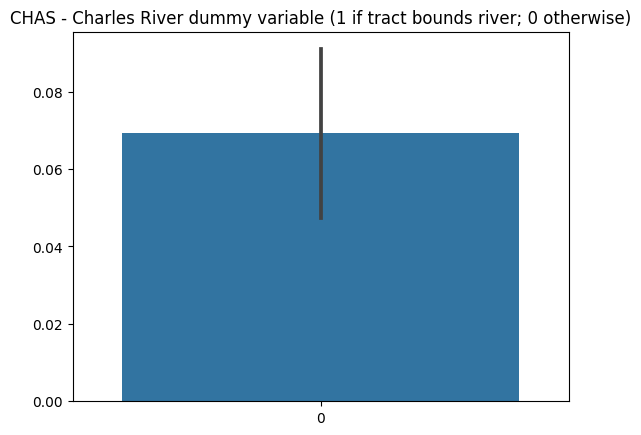

In [9]:
# Provide a bar plot for the Charles river variable
sns.barplot(boston_df['CHAS']).set(title='CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)')

[Text(0.5, 1.0, 'MEDV vs the AGE (age was discretized into 3 groups)')]

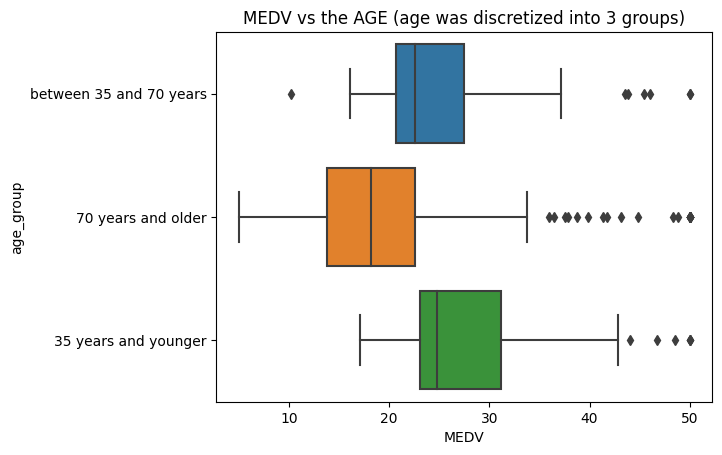

In [10]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger,
# between 35 and 70 years and 70 years and older)
# medv = boston_df[]
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(
    x=boston_df.MEDV,
    y=boston_df.age_group,
    data=boston_df
).set(title="MEDV vs the AGE (age was discretized into 3 groups)")

[Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres')]

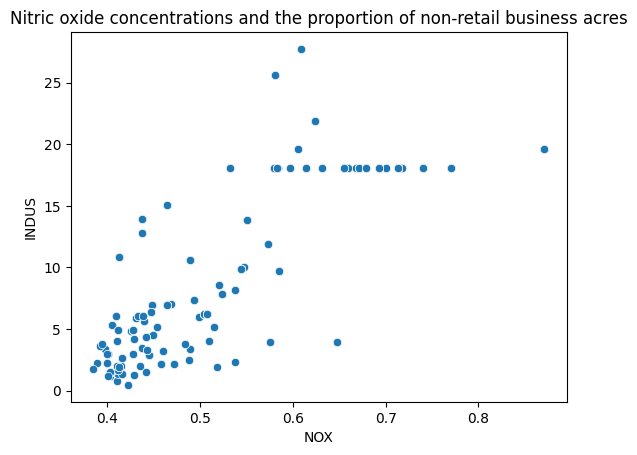

In [11]:
# Provide a scatter plot to show the relationship between Nitric oxide
# concentrations and the proportion of non-retail business acres per
# town. What can you say about the relationship?

# ANSWER: It seems that low concentrations of Nitric oxide is
# associated with low values of INDUS

sns.scatterplot(
    x=boston_df['NOX'],
    y=boston_df['INDUS']
).set(title="Nitric oxide concentrations and the proportion of non-retail business acres")

[Text(0.5, 1.0, 'PTRATIO = pupil to teacher ratio')]

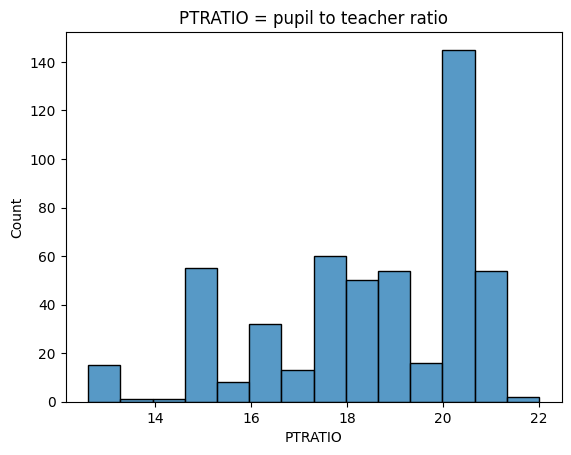

In [13]:
# Create a histogram for the pupil to teacher ratio variable
sns.histplot(boston_df['PTRATIO']).set(title="PTRATIO = pupil to teacher ratio")

Task 5: Use the appropriate tests to answer the questions provided.

Be sure to:

    State your hypothesis.

    Use α = 0.05

    Perform the test Statistics.

    State the conclusion from the test.

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**


In [ ]:
# HYPOTHESIS
# H0 = There is no significant difference in median value of homes bounded by the Charles river.
# since pvalue < 0.05 we fail to reject the null hypothesis.
# H1 = There is a significante difference in the median value

sp.stats.ttest_ind(
    boston_df[boston_df['CHAS'] == 0]['MEDV'],
    boston_df[boston_df['CHAS'] == 1]['MEDV'],
    equal_var=True
)

# CONCLUSION
# Since the p-value is less than alpha value of 0.05, we failed to
# reject null hypothesis since there is NO statistical significance.

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [ ]:
# HYPOTHESIS
# H0 = the three population means are equal
# H1 = At least one of the means differ

sp.stats.f_oneway(
    boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"],
    boston_df[boston_df["age_group"] == '70 years and older']["MEDV"],
    boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"],
    axis=0
)

# CONCLUSION
# Since p-value is less than the alpha value of 0.05, we reject
# the null hypothesis since there is NO statistical significance.

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

In [ ]:
# HYPOTHESIS
# H0 = NOX is not correlated with INDUS
# H1 = NOX is correlated with INDUS

sp.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

# CONCLUSION
# Since the p-value is less than 0.05, we reject the Null hypothesis
# and conclude that there exists a relationship between Nitric Oxide
# and non-retail business acres per town.

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [ ]:
# HYPOTHESIS
# H0: weighted distances to five Boston employment centres are not related to median value
# H1: weighted distances to five Boston employment centres are related to median value

y = boston_df['MEDV']
x = boston_df['DIS']

x = sm.add_constant(x)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        00:54:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.sqrt(0.062)  ##Pearson Coeffiecent valuea

# CONCLUSION
# The square root of R-squared is 0.25, which implies weak correlation between both features

0.24899799195977465